In [14]:
import pandas as pd

df = pd.read_excel("/content/mpi_dataset_q1_2025.xlsx",
                   sheet_name="mpi_dataset_q1_2025")

df.head()


,PROJECT_ID,PROJECT_NAME,PROJECT_DESCRIPTION,ESTIMATED_COST,UPDATE_ACTIVITY,ENVIRONMENTAL_ASSESSMENT_STAGE,CONSTRUCTION_TYPE,CONSTRUCTION_SUBTYPE,PROJECT_TYPE,REGION,...,STANDARDIZED_START_DATE,STANDARDIZED_COMPLETION_DATE,LATITUDE,LONGITUDE,LATITUDE_DMS,LONGITUDE_DMS,TELEPHONE,PROJECT_WEBSITE,FIRST_ENTRY_DATE,LAST_UPDATE
0,4861,École La Vallée,"New school with spaces for 20 kindergarten, 12...",78.0,New proposed project,NaN,Institutional,Education,Educational Services,2. Mainland/Southwest,...,2025-Q2,2027-Q3,NaN,NaN,NaN,NaN,(604) 214-2601,NaN,2025-03-01,2025-03-01
1,4884,Baptiste Nickel Project,Proposed nickel mine that would have a 29-year...,2970.0,New proposed project,NaN,Industrial,Mining,Mining,7. Nechako,...,2028-Q1,2030-Q4,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,2025-03-01
2,4853,Juene Landing - 1L130 to 25kV Conversion with ...,This project is required to convert the 138kV ...,19.0,Project started construction,NaN,Infrastructure,Utilities,Utilities,1. Vancouver Island/Coast,...,2025-Q1,2025-Q3,NaN,NaN,NaN,NaN,(604) 623-4472 Toll Free: 1-866-647-3334,NaN,2025-03-01,2025-03-01
3,4854,Anahim Lake - Station Upgrades for Renewable E...,This project is required to upgrade the Anahim...,44.0,Project started construction,NaN,Infrastructure,Utilities,Utilities,6. North Coast,...,2025-Q1,2026-Q4,NaN,NaN,NaN,NaN,(604) 623-4472 Toll Free: 1-866-647-3334,NaN,2025-03-01,2025-03-01
4,4855,Mica - U1 - U4 Circuit Breaker and Iso-phase B...,This project is to address reliability risks a...,176.0,Project started construction,NaN,Infrastructure,Utilities,Utilities,3. Thompson-Okanagan,...,2025-Q1,2028-Q4,NaN,NaN,NaN,NaN,(604) 623-4472 Toll Free: 1-866-647-3334,NaN,2025-03-01,2025-03-01


In [15]:
missing = df.isnull().sum().reset_index()
missing.columns = ["Column", "MissingCount"]
missing["MissingPercent"] = (missing["MissingCount"] / len(df)) * 100
missing


,Column,MissingCount,MissingPercent
0,PROJECT_ID,0,0.000000
1,PROJECT_NAME,0,0.000000
2,PROJECT_DESCRIPTION,0,0.000000
3,ESTIMATED_COST,78,7.815631
4,UPDATE_ACTIVITY,933,93.486974
5,ENVIRONMENTAL_ASSESSMENT_STAGE,920,92.184369
6,CONSTRUCTION_TYPE,0,0.000000
7,CONSTRUCTION_SUBTYPE,0,0.000000
8,PROJECT_TYPE,0,0.000000
9,REGION,0,0.000000


In [16]:
missing.to_csv("/content/missing_values_summary.csv", index=False)


In [17]:
invalid_cost = df[df["ESTIMATED_COST"] <= 0]
invalid_cost.to_csv("/content/invalid_cost.csv", index=False)
invalid_cost.shape


(0, 39)

In [18]:
invalid_latitude = df[(df["LATITUDE"] < -90) | (df["LATITUDE"] > 90)]
invalid_latitude.to_csv("/content/invalid_latitude.csv", index=False)
invalid_latitude.shape


(0, 39)

In [19]:
invalid_longitude = df[(df["LONGITUDE"] < -180) | (df["LONGITUDE"] > 180)]
invalid_longitude.to_csv("/content/invalid_longitude.csv", index=False)
invalid_longitude.shape


(0, 39)

In [20]:
invalid_dates = df[
    (df["STANDARDIZED_START_DATE"] > df["STANDARDIZED_COMPLETION_DATE"]) |
    (df["STANDARDIZED_COMPLETION_DATE"].isnull())
]

invalid_dates.to_csv("/content/invalid_dates.csv", index=False)
invalid_dates.shape


(448, 39)

In [21]:
duplicates = df[df.duplicated()]
duplicates.to_csv("/content/duplicate_rows.csv", index=False)
duplicates.shape


(0, 39)

In [22]:
region_conflicts = df.groupby("PROJECT_ID")["REGION"].nunique()
region_conflicts = region_conflicts[region_conflicts > 1]
region_conflicts


,REGION
PROJECT_ID,


In [23]:
missing_muni = df[df["MUNICIPALITY"].isnull()]
missing_muni.to_csv("/content/missing_municipalities.csv", index=False)
missing_muni.shape


(0, 39)

In [24]:
summary_counts = {
    "rows_total": len(df),
    "missing": missing.set_index("Column")["MissingCount"].to_dict(),
    "invalid_cost": len(invalid_cost),
    "invalid_latitude": len(invalid_latitude),
    "invalid_longitude": len(invalid_longitude),
    "invalid_dates": len(invalid_dates),
    "duplicates": len(duplicates),
    "missing_municipalities": len(missing_muni)
}
summary_counts


{'rows_total': 998,
 'missing': {'PROJECT_ID': 0,
  'PROJECT_NAME': 0,
  'PROJECT_DESCRIPTION': 0,
  'ESTIMATED_COST': 78,
  'UPDATE_ACTIVITY': 933,
  'ENVIRONMENTAL_ASSESSMENT_STAGE': 920,
  'CONSTRUCTION_TYPE': 0,
  'CONSTRUCTION_SUBTYPE': 0,
  'PROJECT_TYPE': 0,
  'REGION': 0,
  'MUNICIPALITY': 0,
  'DEVELOPER': 41,
  'ARCHITECT': 762,
  'PROJECT_STATUS': 0,
  'PROJECT_STAGE': 578,
  'PROJECT_CATEGORY_NAME': 0,
  'PUBLIC_FUNDING_IND': 0,
  'PROVINCIAL_FUNDING': 0,
  'FEDERAL_FUNDING': 0,
  'MUNICIPAL_FUNDING': 0,
  'OTHER_PUBLIC_FUNDING': 0,
  'GREEN_BUILDING_IND': 0,
  'GREEN_BUILDING_DESC': 903,
  'CLEAN_ENERGY_IND': 0,
  'INDIGENOUS_IND': 0,
  'INDIGENOUS_NAMES': 935,
  'INDIGENOUS_AGREEMENT': 966,
  'CONSTRUCTION_JOBS': 898,
  'OPERATING_JOBS': 909,
  'STANDARDIZED_START_DATE': 466,
  'STANDARDIZED_COMPLETION_DATE': 448,
  'LATITUDE': 362,
  'LONGITUDE': 362,
  'LATITUDE_DMS': 361,
  'LONGITUDE_DMS': 361,
  'TELEPHONE': 127,
  'PROJECT_WEBSITE': 839,
  'FIRST_ENTRY_DATE': 0,
  '

In [25]:
{
  'rows_total': ...,
  'missing': { 'PROJECT_DESCRIPTION': ..., 'LATITUDE': ..., ... },
  'invalid_cost': ...,
  'invalid_latitude': ...,
  ...
}


SyntaxError: ':' expected after dictionary key (ipython-input-688089665.py, line 3)

In [26]:
summary_counts = {
    "rows_total": len(df),
    "missing": missing_values_summary.set_index("Column")["MissingCount"].to_dict(),
    "invalid_cost": len(invalid_cost),
    "invalid_latitude": len(invalid_latitude),
    "invalid_longitude": len(invalid_longitude),
    "invalid_dates": len(invalid_dates),
    "duplicates": len(duplicates),
    "missing_municipality": len(missing_muni)
}

summary_counts


NameError: name 'missing_values_summary' is not defined

In [27]:
missing_values_summary = df.isnull().sum().reset_index()
missing_values_summary.columns = ["Column", "MissingCount"]
missing_values_summary


,Column,MissingCount
0,PROJECT_ID,0
1,PROJECT_NAME,0
2,PROJECT_DESCRIPTION,0
3,ESTIMATED_COST,78
4,UPDATE_ACTIVITY,933
5,ENVIRONMENTAL_ASSESSMENT_STAGE,920
6,CONSTRUCTION_TYPE,0
7,CONSTRUCTION_SUBTYPE,0
8,PROJECT_TYPE,0
9,REGION,0


In [28]:
summary_counts = {
    "rows_total": len(df),
    "missing": missing_values_summary.set_index("Column")["MissingCount"].to_dict(),
    "invalid_cost": len(invalid_cost),
    "invalid_latitude": len(invalid_latitude),
    "invalid_longitude": len(invalid_longitude),
    "invalid_dates": len(invalid_dates),
    "duplicates": len(duplicates),
    "missing_municipality": len(missing_muni)
}

summary_counts


{'rows_total': 998,
 'missing': {'PROJECT_ID': 0,
  'PROJECT_NAME': 0,
  'PROJECT_DESCRIPTION': 0,
  'ESTIMATED_COST': 78,
  'UPDATE_ACTIVITY': 933,
  'ENVIRONMENTAL_ASSESSMENT_STAGE': 920,
  'CONSTRUCTION_TYPE': 0,
  'CONSTRUCTION_SUBTYPE': 0,
  'PROJECT_TYPE': 0,
  'REGION': 0,
  'MUNICIPALITY': 0,
  'DEVELOPER': 41,
  'ARCHITECT': 762,
  'PROJECT_STATUS': 0,
  'PROJECT_STAGE': 578,
  'PROJECT_CATEGORY_NAME': 0,
  'PUBLIC_FUNDING_IND': 0,
  'PROVINCIAL_FUNDING': 0,
  'FEDERAL_FUNDING': 0,
  'MUNICIPAL_FUNDING': 0,
  'OTHER_PUBLIC_FUNDING': 0,
  'GREEN_BUILDING_IND': 0,
  'GREEN_BUILDING_DESC': 903,
  'CLEAN_ENERGY_IND': 0,
  'INDIGENOUS_IND': 0,
  'INDIGENOUS_NAMES': 935,
  'INDIGENOUS_AGREEMENT': 966,
  'CONSTRUCTION_JOBS': 898,
  'OPERATING_JOBS': 909,
  'STANDARDIZED_START_DATE': 466,
  'STANDARDIZED_COMPLETION_DATE': 448,
  'LATITUDE': 362,
  'LONGITUDE': 362,
  'LATITUDE_DMS': 361,
  'LONGITUDE_DMS': 361,
  'TELEPHONE': 127,
  'PROJECT_WEBSITE': 839,
  'FIRST_ENTRY_DATE': 0,
  '

FileNotFoundError: [Errno 2] No such file or directory: '/content/results/completeness_chart.png'

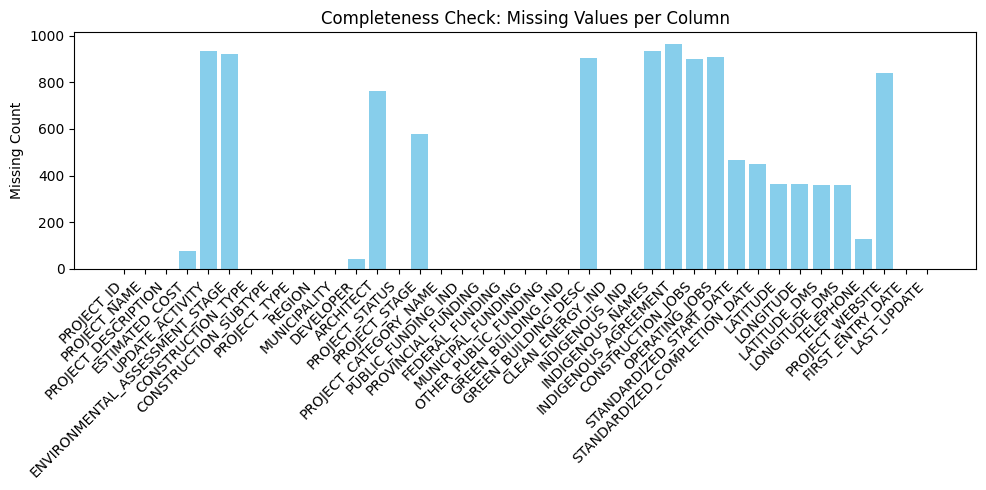

In [29]:
import matplotlib.pyplot as plt

# Create completeness bar chart
plt.figure(figsize=(10, 5))
plt.bar(missing_values_summary["Column"], missing_values_summary["MissingCount"], color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.title("Completeness Check: Missing Values per Column")
plt.ylabel("Missing Count")
plt.tight_layout()

# Save chart
plt.savefig("/content/results/completeness_chart.png", dpi=300)

plt.show()

print("Saved as: /content/results/completeness_chart.png")


In [30]:
import os

# Create results folder if it doesn't exist
os.makedirs("/content/results", exist_ok=True)

print("Folder ready:", os.listdir("/content"))


Folder ready: ['.config', 'missing_values_summary.csv', 'results', 'mpi_dataset_q1_2025.xlsx', '.ipynb_checkpoints', 'invalid_cost.csv', 'invalid_dates.csv', 'missing_municipalities.csv', 'duplicate_rows.csv', 'invalid_longitude.csv', 'invalid_latitude.csv', 'sample_data']


In [33]:
import os

# Create results folder if it doesn't exist
os.makedirs("/content/results", exist_ok=True)

print("Folder ready:", os.listdir("/content"))


Folder ready: ['.config', 'missing_values_summary.csv', 'results', 'mpi_dataset_q1_2025.xlsx', '.ipynb_checkpoints', 'invalid_cost.csv', 'invalid_dates.csv', 'missing_municipalities.csv', 'duplicate_rows.csv', 'invalid_longitude.csv', 'invalid_latitude.csv', 'sample_data']


In [37]:
import os

# Create results folder
os.makedirs("/content/results", exist_ok=True)

print("Folder ready:", os.listdir("/content"))


Folder ready: ['.config', 'missing_values_summary.csv', 'results', 'mpi_dataset_q1_2025.xlsx', '.ipynb_checkpoints', 'invalid_cost.csv', 'invalid_dates.csv', 'missing_municipalities.csv', 'duplicate_rows.csv', 'invalid_longitude.csv', 'invalid_latitude.csv', 'sample_data']


In [38]:
!ls /content/results


In [39]:
os.listdir("/content/results")


[]

In [40]:
{
  "rows_total": 5000,
  "missing_values": {...},
  "invalid_values": {...},
  "coordinate_issues": {...},
  "date_conflicts": {...},
  "outliers_cost": 42,
  "duplicates": 18
}


{'rows_total': 5000,
 'missing_values': {Ellipsis},
 'invalid_values': {Ellipsis},
 'coordinate_issues': {Ellipsis},
 'date_conflicts': {Ellipsis},
 'outliers_cost': 42,
 'duplicates': 18}

In [42]:
!ls /content/results


In [44]:
!ls /content/results


In [45]:
import os
import matplotlib.pyplot as plt

# Make sure results folder exists
os.makedirs("/content/results", exist_ok=True)


In [46]:
import os
import matplotlib.pyplot as plt

# Make sure results folder exists
os.makedirs("/content/results", exist_ok=True)


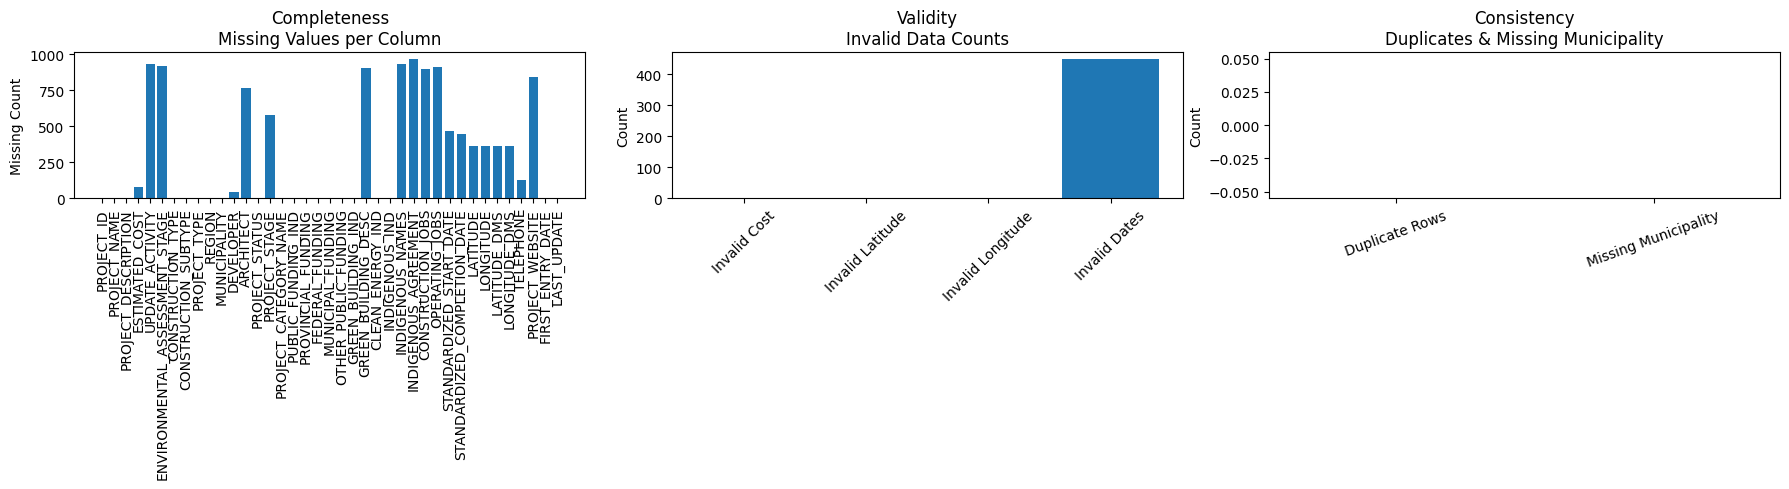

Dashboard saved as: /content/results/data_quality_dashboard.png


In [47]:
# -------- DATA QUALITY DASHBOARD --------

# Prepare data for each section
# Completeness
comp_cols = missing_values_summary["Column"]
comp_missing = missing_values_summary["MissingCount"]

# Validity
validity_labels = ["Invalid Cost", "Invalid Latitude", "Invalid Longitude", "Invalid Dates"]
validity_counts = [
    len(invalid_cost),
    len(invalid_latitude),
    len(invalid_longitude),
    len(invalid_dates)
]

# Consistency
cons_labels = ["Duplicate Rows", "Missing Municipality"]
cons_counts = [
    len(duplicates),
    len(missing_muni)
]

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ----- Panel 1: Completeness -----
axes[0].bar(comp_cols, comp_missing)
axes[0].set_title("Completeness\nMissing Values per Column")
axes[0].set_ylabel("Missing Count")
axes[0].tick_params(axis='x', rotation=90)

# ----- Panel 2: Validity -----
axes[1].bar(validity_labels, validity_counts)
axes[1].set_title("Validity\nInvalid Data Counts")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# ----- Panel 3: Consistency -----
axes[2].bar(cons_labels, cons_counts)
axes[2].set_title("Consistency\nDuplicates & Missing Municipality")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=20)

plt.tight_layout()

# Save dashboard
dashboard_path = "/content/results/data_quality_dashboard.png"
plt.savefig(dashboard_path, dpi=300)
plt.show()

print("Dashboard saved as:", dashboard_path)


In [48]:
!ls /content/results


data_quality_dashboard.png


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Make sure results folder exists
os.makedirs("/content/results", exist_ok=True)

# Copy to avoid SettingWithCopy warnings
geo_df = df[["LATITUDE", "LONGITUDE"]].copy()

# Define validity ranges (approximate BC bounding box)
lat_min, lat_max = 48, 60
lon_min, lon_max = -140, -110

# Boolean masks
valid_mask = (
    geo_df["LATITUDE"].between(lat_min, lat_max, inclusive="both")
    & geo_df["LONGITUDE"].between(lon_min, lon_max, inclusive="both")
)

invalid_mask = ~valid_mask | geo_df["LATITUDE"].isna() | geo_df["LONGITUDE"].isna()

valid_points = geo_df[valid_mask]
invalid_points = geo_df[invalid_mask]
print("Valid points:", len(valid_points))
print("Invalid / missing points:", len(invalid_points))


Valid points: 636
Invalid / missing points: 362


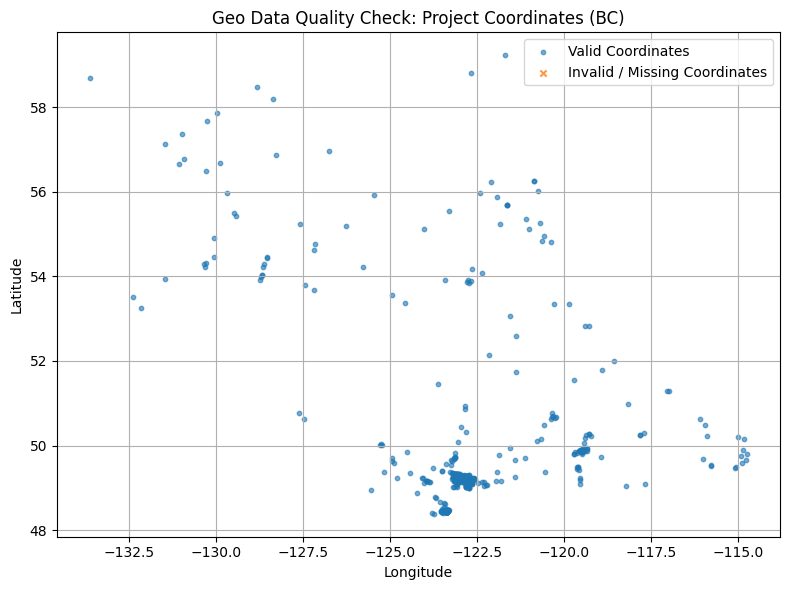

Geo validation map saved as: /content/results/geo_validation_map.png


In [50]:
plt.figure(figsize=(8, 6))

# Plot valid coordinates
plt.scatter(
    valid_points["LONGITUDE"],
    valid_points["LATITUDE"],
    s=10,
    alpha=0.6,
    label="Valid Coordinates"
)

# Plot invalid coordinates (if any)
if len(invalid_points) > 0:
    plt.scatter(
        invalid_points["LONGITUDE"],
        invalid_points["LATITUDE"],
        s=20,
        alpha=0.8,
        marker="x",
        label="Invalid / Missing Coordinates"
    )

plt.title("Geo Data Quality Check: Project Coordinates (BC)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()

geo_path = "/content/results/geo_validation_map.png"
plt.savefig(geo_path, dpi=300)
plt.show()

print("Geo validation map saved as:", geo_path)


In [51]:
!ls /content/results


data_quality_dashboard.png  geo_validation_map.png


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make sure results folder exists
os.makedirs("/content/results", exist_ok=True)

# Parse dates safely
df["STANDARDIZED_START_DATE"] = pd.to_datetime(
    df["STANDARDIZED_START_DATE"], errors="coerce"
)
df["STANDARDIZED_COMPLETION_DATE"] = pd.to_datetime(
    df["STANDARDIZED_COMPLETION_DATE"], errors="coerce"
)

# Quick check
df[["STANDARDIZED_START_DATE", "STANDARDIZED_COMPLETION_DATE"]].head()


/tmp/ipython-input-1803513649.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["STANDARDIZED_START_DATE"] = pd.to_datetime(
/tmp/ipython-input-1803513649.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["STANDARDIZED_COMPLETION_DATE"] = pd.to_datetime(


,STANDARDIZED_START_DATE,STANDARDIZED_COMPLETION_DATE
0,2025-04-01,2027-07-01
1,2028-01-01,2030-10-01
2,2025-01-01,2025-07-01
3,2025-01-01,2026-10-01
4,2025-01-01,2028-10-01


In [53]:
# Date conflicts: completion before start
date_conflict = df[
    (df["STANDARDIZED_START_DATE"].notna())
    & (df["STANDARDIZED_COMPLETION_DATE"].notna())
    & (df["STANDARDIZED_COMPLETION_DATE"] < df["STANDARDIZED_START_DATE"])
]

# Missing important dates
missing_start = df[df["STANDARDIZED_START_DATE"].isna()]
missing_completion = df[df["STANDARDIZED_COMPLETION_DATE"].isna()]

print("Projects with completion before start:", len(date_conflict))
print("Projects with missing start date:", len(missing_start))
print("Projects with missing completion date:", len(missing_completion))

# Save detailed CSV (optional but nice for GitHub)
date_conflict.to_csv("/content/results/invalid_dates_detailed.csv", index=False)


Projects with completion before start: 0
Projects with missing start date: 466
Projects with missing completion date: 448


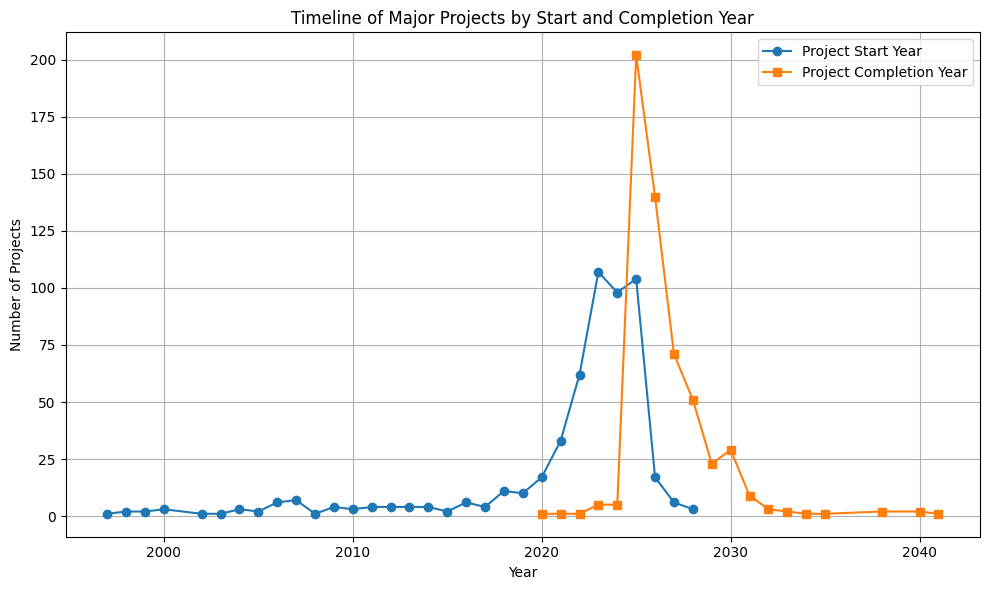

Date timeline chart saved as: /content/results/date_timeline_chart.png


In [54]:
# Extract years
start_year = df["STANDARDIZED_START_DATE"].dt.year
completion_year = df["STANDARDIZED_COMPLETION_DATE"].dt.year

# Group by year
start_counts = start_year.value_counts().sort_index()
completion_counts = completion_year.value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Plot start year counts
plt.plot(start_counts.index, start_counts.values, marker="o", label="Project Start Year")

# Plot completion year counts
plt.plot(
    completion_counts.index,
    completion_counts.values,
    marker="s",
    label="Project Completion Year"
)

plt.title("Timeline of Major Projects by Start and Completion Year")
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.legend()
plt.grid(True)
plt.tight_layout()

timeline_path = "/content/results/date_timeline_chart.png"
plt.savefig(timeline_path, dpi=300)
plt.show()

print("Date timeline chart saved as:", timeline_path)


In [55]:
!ls /content/results


data_quality_dashboard.png  geo_validation_map.png
date_timeline_chart.png     invalid_dates_detailed.csv


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure results folder exists
os.makedirs("/content/results", exist_ok=True)

# Clean numeric cost column (if needed)
df["ESTIMATED_COST"] = pd.to_numeric(df["ESTIMATED_COST"], errors="coerce")

# Remove missing cost values for outlier calculation
cost_data = df["ESTIMATED_COST"].dropna()

# Compute IQR bounds
Q1 = cost_data.quantile(0.25)
Q3 = cost_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("IQR =", IQR


SyntaxError: incomplete input (ipython-input-726178002.py, line 22)

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure results folder exists
os.makedirs("/content/results", exist_ok=True)

# Convert cost to numeric
df["ESTIMATED_COST"] = pd.to_numeric(df["ESTIMATED_COST"], errors="coerce")

# Remove NaN values
cost_data = df["ESTIMATED_COST"].dropna()


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure results folder exists
os.makedirs("/content/results", exist_ok=True)

# Convert cost to numeric
df["ESTIMATED_COST"] = pd.to_numeric(df["ESTIMATED_COST"], errors="coerce")

# Remove NaN values
cost_data = df["ESTIMATED_COST"].dropna()

# Calculate IQR
Q1 = cost_data.quantile(0.25)
Q3 = cost_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("IQR =", IQR)
print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)

# Detect outliers
cost_outliers = df[
    (df["ESTIMATED_COST"] < lower_bound) |
    (df["ESTIMATED_COST"] > upper_bound)
]

print("Number of cost outliers:", len(cost_outliers))

# Save CSV
outlier_csv_path = "/content/results/cost_outliers.csv"
cost_outliers.to_csv(outlier_csv_path, index=False)

print("Saved:", outlier_csv_path)


IQR = 165.25
Lower Bound = -218.125
Upper Bound = 442.875
Number of cost outliers: 130
Saved: /content/results/cost_outliers.csv


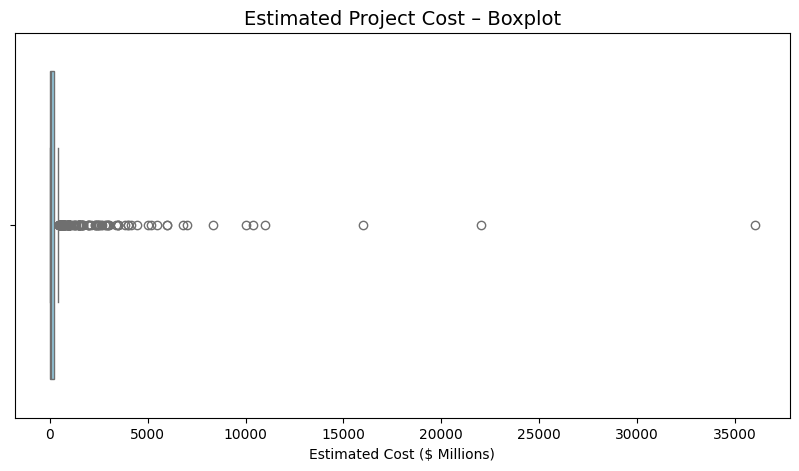

Boxplot saved to: /content/results/cost_boxplot.png


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure results folder exists
os.makedirs("/content/results", exist_ok=True)

# Convert to numeric (safeguard)
df["ESTIMATED_COST"] = pd.to_numeric(df["ESTIMATED_COST"], errors="coerce")

# Drop NaN values
clean_cost = df["ESTIMATED_COST"].dropna()

# Plot boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=clean_cost, color="skyblue")
plt.title("Estimated Project Cost – Boxplot", fontsize=14)
plt.xlabel("Estimated Cost ($ Millions)")

# Save chart
save_path = "/content/results/cost_boxplot.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print("Boxplot saved to:", save_path)
